## **Project : Estimation of Energy Usage by Accelerometric Analysis Methodology**

*Our study proposes an approach: precisely characterising the energy usage of different exercises using an AX3 accelerometer, we will dissect the biomechanical characteristics of three emblematic exercises: boxing, running and jumping jacks.* 

### 1. Data collection and pre-processing

##### **Packages**


In [1]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.


##### **Reading data**

In [2]:
import pandas as pd

filename1 = "C:/Users/SCD UM/OneDrive/Documents/Cours M2 2024-2025/S1/Santé Activité Physique/MOTTET/Projet_axivity/HAH913E-2024-physical-activity-analysis-main/data/running_DATA.resampled.csv"
filename2 = "C:/Users/SCD UM/OneDrive/Documents/Cours M2 2024-2025/S1/Santé Activité Physique/MOTTET/Projet_axivity/HAH913E-2024-physical-activity-analysis-main/data/boxe_DATA.resampled.csv"
filename3 = "C:/Users/SCD UM/OneDrive/Documents/Cours M2 2024-2025/S1/Santé Activité Physique/MOTTET/Projet_axivity/HAH913E-2024-physical-activity-analysis-main/data/jump_DATA.resampled.csv"

acc_run = pd.read_csv(filename1, sep=",") # running accelerometrer data
acc_box = pd.read_csv(filename2, sep=",") # boxing accelerometrer data
acc_jump = pd.read_csv(filename3, sep=",") # jumping jacks accelerometrer data


In [3]:
print(acc_run)
print(acc_box)
print(acc_jump)

                          Time  Accel-X (g)   Accel-Y (g)   Accel-Z (g)
0      2024-11-26 22:30:00.000     0.000000      0.000000      0.000000
1      2024-11-26 22:30:00.009     0.000000      0.000000      0.000000
2      2024-11-26 22:30:00.019     0.000000      0.000000      0.000000
3      2024-11-26 22:30:00.029     0.000000      0.000000      0.000000
4      2024-11-26 22:30:00.039     0.000000      0.000000      0.000000
...                        ...          ...           ...           ...
89995  2024-11-26 22:44:59.950    -0.972168      0.244141     -0.270264
89996  2024-11-26 22:44:59.960    -0.890381      0.205566     -0.285400
89997  2024-11-26 22:44:59.970    -0.821777      0.171387     -0.274170
89998  2024-11-26 22:44:59.980    -0.779785      0.126221     -0.239502
89999  2024-11-26 22:44:59.990    -0.734131      0.102295     -0.205078

[90000 rows x 4 columns]
                          Time  Accel-X (g)   Accel-Y (g)   Accel-Z (g)
0      2024-11-26 23:23:00.000     0.0

##### **Plot data**

<Axes: >

<Figure size 1900x600 with 0 Axes>

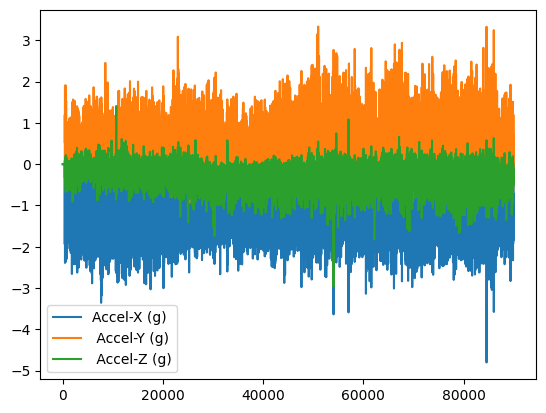

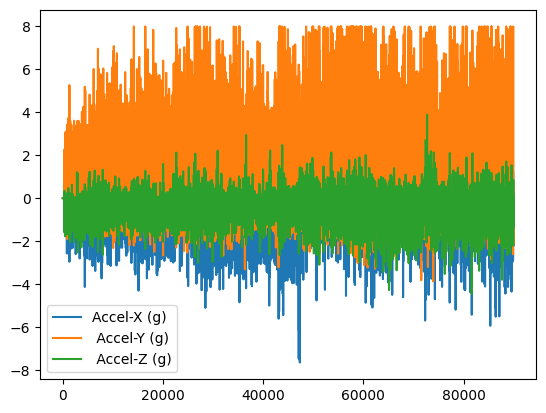

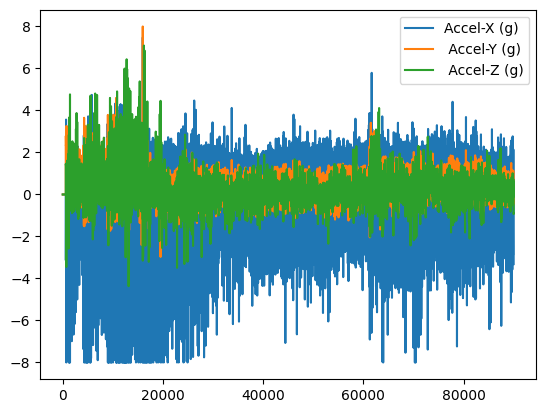

In [4]:
import matplotlib.pyplot as plt # for plotting and graphing data

plt.figure(figsize=(19,6))

acc_run.plot()
acc_box.plot()
acc_jump.plot()

##### **Scaling**

In [4]:
def scaling (acc_data): 
    acc_data.columns = ['Time', 'Accel-X (g)', 'Accel-Y (g)','Accel-Z (g)']
    acc_ = acc_data.drop('Time', axis=1)
    acc_time = acc_data[['Time']]
    acc_x = acc_data[['Accel-X (g)']]
    acc_y = acc_data[['Accel-Y (g)']]
    acc_z = acc_data[['Accel-Z (g)']]
    
    return acc_time,acc_,acc_x,acc_y,acc_z


In [5]:
# Scaling function
acc_time,Acc_run,Acc_x,Acc_y,Acc_z=scaling(acc_run)
acc_time,Acc_box,Acc_x,Acc_y,Acc_z=scaling(acc_box)
acc_time,Acc_jump,Acc_x,Acc_y,Acc_z=scaling(acc_jump)

In [6]:
import numpy as np
np.shape(acc_run)

(90000, 4)

In [7]:
import numpy as np
duration = 90000 / 100  # échantillonné à 100 
print(duration)
time = np.linspace(0, duration, 90000)
print(time)

900.0
[0.00000000e+00 1.00001111e-02 2.00002222e-02 ... 8.99980000e+02
 8.99990000e+02 9.00000000e+02]


### 2. Visualisation and analysis

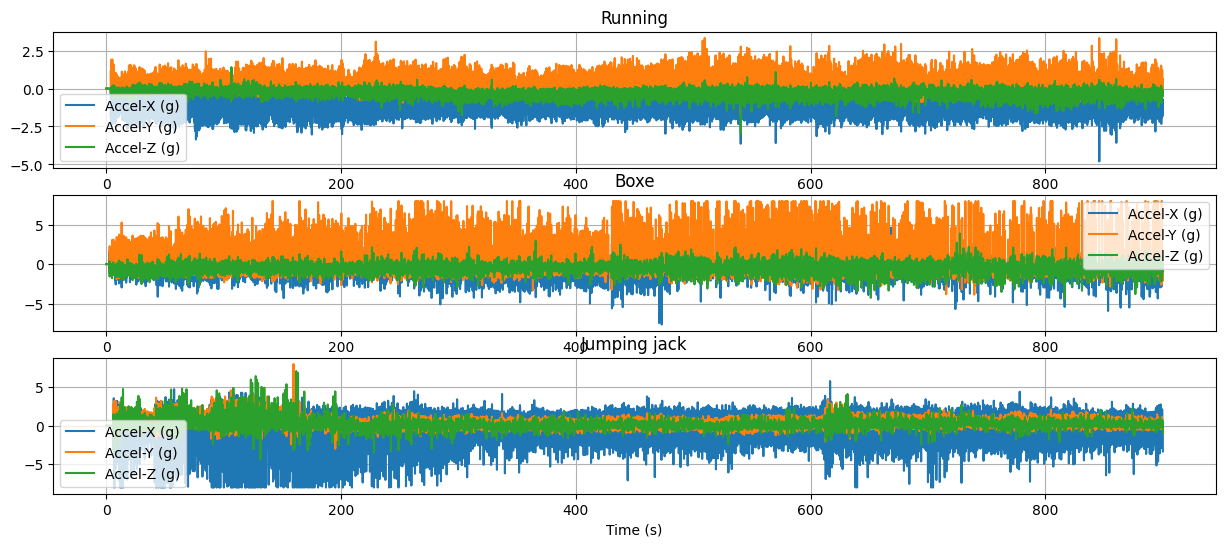

In [9]:
import matplotlib.pyplot as plt # pour tracer et visualiser les données sous forme de graphiques

plt.figure(figsize=(15,6))

plt.subplot(3,1,1)

plt.plot(time,Acc_run)
plt.xlabel('Time (s)') 
plt.ylabel('') 
plt.title('Running')
plt.gca().legend(('Accel-X (g)','Accel-Y (g)','Accel-Z (g)'))
plt.grid()

plt.subplot(3,1,2)

plt.plot(time,Acc_box)
plt.xlabel('Time (s)') 
plt.ylabel('') 
plt.title('Boxe')
plt.gca().legend(('Accel-X (g)','Accel-Y (g)','Accel-Z (g)'))
plt.grid()

plt.subplot(3,1,3)

plt.plot(time,Acc_jump)
plt.xlabel('Time (s)') 
plt.ylabel('') 
plt.title('Jumping jack')
plt.gca().legend(('Accel-X (g)','Accel-Y (g)','Accel-Z (g)'))
plt.grid()

##### **Filter**

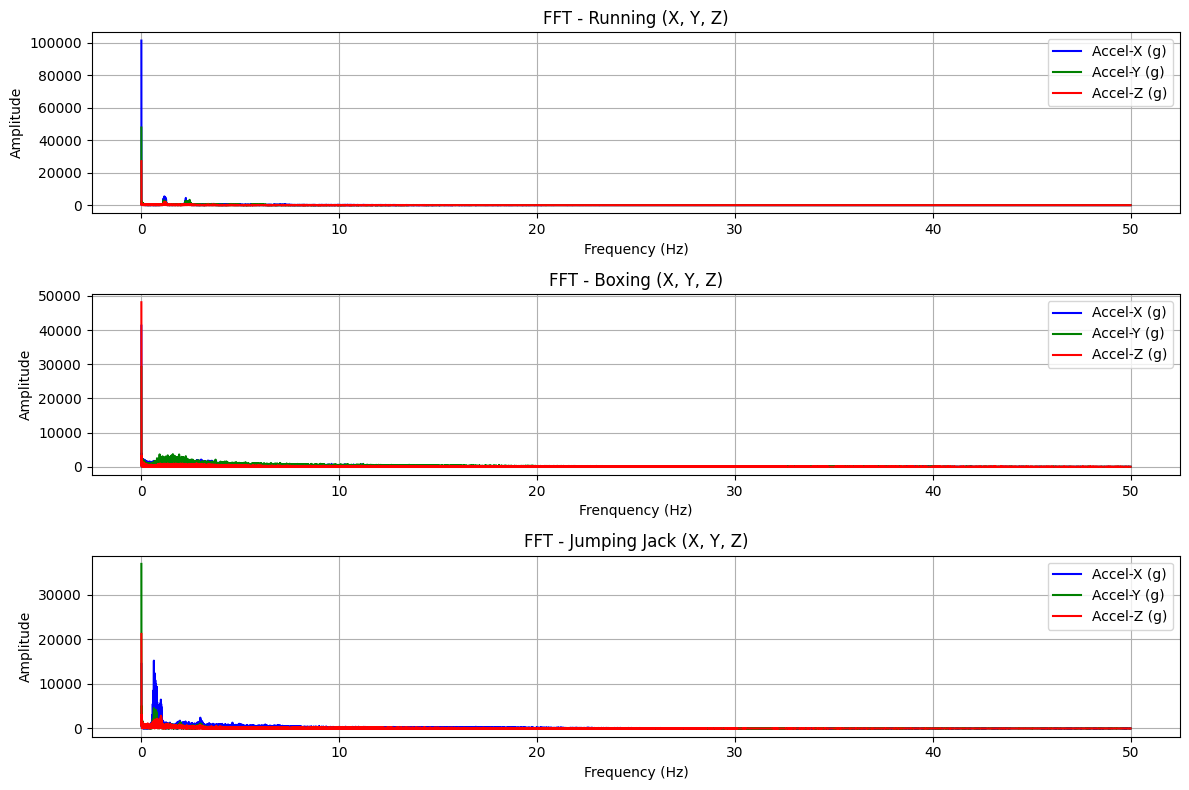

In [10]:
# Visualisation of dominant frequencies

import numpy as np
import matplotlib.pyplot as plt


fs = 100  


fft_run_x = np.fft.fft(Acc_run['Accel-X (g)'])
fft_run_y = np.fft.fft(Acc_run['Accel-Y (g)'])
fft_run_z = np.fft.fft(Acc_run['Accel-Z (g)'])

fft_box_x = np.fft.fft(Acc_box['Accel-X (g)'])
fft_box_y = np.fft.fft(Acc_box['Accel-Y (g)'])
fft_box_z = np.fft.fft(Acc_box['Accel-Z (g)'])

fft_jump_x = np.fft.fft(Acc_jump['Accel-X (g)'])
fft_jump_y = np.fft.fft(Acc_jump['Accel-Y (g)'])
fft_jump_z = np.fft.fft(Acc_jump['Accel-Z (g)'])


frequencies = np.fft.fftfreq(len(Acc_run['Accel-X (g)']), 1/fs)


plt.figure(figsize=(12, 8))


plt.subplot(3, 1, 1)
plt.plot(frequencies[:len(frequencies)//2], np.abs(fft_run_x)[:len(frequencies)//2], label='Accel-X (g)', color='blue')
plt.plot(frequencies[:len(frequencies)//2], np.abs(fft_run_y)[:len(frequencies)//2], label='Accel-Y (g)', color='green')
plt.plot(frequencies[:len(frequencies)//2], np.abs(fft_run_z)[:len(frequencies)//2], label='Accel-Z (g)', color='red')


plt.title('FFT - Running (X, Y, Z)')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.legend()
plt.grid()


plt.subplot(3, 1, 2)
plt.plot(frequencies[:len(frequencies)//2], np.abs(fft_box_x)[:len(frequencies)//2], label='Accel-X (g)', color='blue')
plt.plot(frequencies[:len(frequencies)//2], np.abs(fft_box_y)[:len(frequencies)//2], label='Accel-Y (g)', color='green')
plt.plot(frequencies[:len(frequencies)//2], np.abs(fft_box_z)[:len(frequencies)//2], label='Accel-Z (g)', color='red')

plt.title('FFT - Boxing (X, Y, Z)')
plt.xlabel('Frenquency (Hz)')
plt.ylabel('Amplitude')
plt.legend()
plt.grid()


plt.subplot(3, 1, 3)
plt.plot(frequencies[:len(frequencies)//2], np.abs(fft_jump_x)[:len(frequencies)//2], label='Accel-X (g)', color='blue')
plt.plot(frequencies[:len(frequencies)//2], np.abs(fft_jump_y)[:len(frequencies)//2], label='Accel-Y (g)', color='green')
plt.plot(frequencies[:len(frequencies)//2], np.abs(fft_jump_z)[:len(frequencies)//2], label='Accel-Z (g)', color='red')


plt.title('FFT - Jumping Jack (X, Y, Z)')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()


In [11]:
pip install scipy

Note: you may need to restart the kernel to use updated packages.


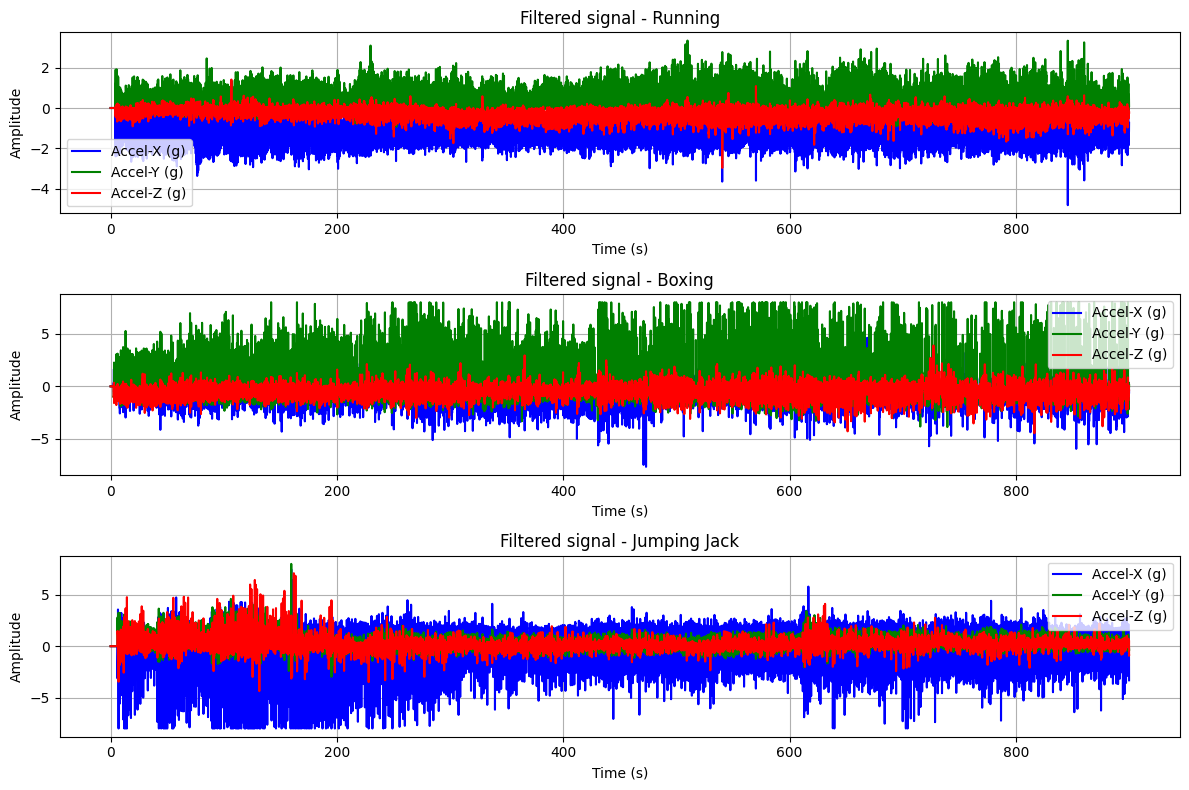

In [12]:
# Application of the low-pass filter (butterworth)
from scipy.signal import butter, filtfilt


cutoff_frequency = 10
fs = 100  # Sampling frequency


def butter_lowpass(cutoff, fs, order=4):
    nyquist = 0.5 * fs  
    normal_cutoff = cutoff / nyquist  
    b, a = butter(order, normal_cutoff, btype='low', analog=False)  
    return b, a


def butter_lowpass_filter(data, cutoff, fs, order=4):
    b, a = butter_lowpass(cutoff, fs, order)  
    y = filtfilt(b, a, data)  
    return y


filtered_acc_run_x = butter_lowpass_filter(Acc_run['Accel-X (g)'], cutoff_frequency, fs)
filtered_acc_run_y = butter_lowpass_filter(Acc_run['Accel-Y (g)'], cutoff_frequency, fs)
filtered_acc_run_z = butter_lowpass_filter(Acc_run['Accel-Z (g)'], cutoff_frequency, fs)


filtered_acc_box_x = butter_lowpass_filter(Acc_box['Accel-X (g)'], cutoff_frequency, fs)
filtered_acc_box_y= butter_lowpass_filter(Acc_box['Accel-Y (g)'], cutoff_frequency, fs)
filtered_acc_box_z = butter_lowpass_filter(Acc_box['Accel-Z (g)'], cutoff_frequency, fs)


filtered_acc_jump_x = butter_lowpass_filter(Acc_jump['Accel-X (g)'], cutoff_frequency, fs)
filtered_acc_jump_y = butter_lowpass_filter(Acc_jump['Accel-Y (g)'], cutoff_frequency, fs)
filtered_acc_jump_z = butter_lowpass_filter(Acc_jump['Accel-Z (g)'], cutoff_frequency, fs)

plt.figure(figsize=(12, 8))

plt.subplot(3, 1, 1)
plt.plot(time, Acc_run['Accel-X (g)'], label='Accel-X (g)', color='blue')  
plt.plot(time, Acc_run['Accel-Y (g)'], label='Accel-Y (g)', color='green') 
plt.plot(time, Acc_run['Accel-Z (g)'], label='Accel-Z (g)', color='red')   

plt.title('Filtered signal - Running')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.legend()
plt.grid()

plt.subplot(3, 1, 2)
plt.plot(time, Acc_box['Accel-X (g)'], label='Accel-X (g)', color='blue')  
plt.plot(time, Acc_box['Accel-Y (g)'], label='Accel-Y (g)', color='green') 
plt.plot(time, Acc_box['Accel-Z (g)'], label='Accel-Z (g)', color='red')  

plt.title('Filtered signal - Boxing')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.legend()
plt.grid()

plt.subplot(3, 1, 3)
plt.plot(time, Acc_jump['Accel-X (g)'], label='Accel-X (g)', color='blue')  
plt.plot(time, Acc_jump['Accel-Y (g)'], label='Accel-Y (g)', color='green') 
plt.plot(time, Acc_jump['Accel-Z (g)'], label='Accel-Z (g)', color='red')  

plt.title('Filtered signal - Jumping Jack')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()




##### **Count of duration in each intensity level**

##### **ENMO « Euclidian Norm Minus One »**

√(x² + y² + z²) − 1 (avec 1 valeur de gravité)

https://www.sciencedirect.com/science/article/pii/S0398762018314858

In [13]:
def ENMO (acc_data):
    acc_data['ENMO'] = np.sqrt(acc_data['Accel-X (g)']**2 + acc_data['Accel-Y (g)']**2 + acc_data['Accel-Z (g)']**2) - 1  # formula
    acc_data['ENMO'] = acc_data['ENMO'].clip(lower=0)  # data normalisation 
    ENMO=acc_data[['ENMO']]
    return ENMO

In [14]:
# ENMO function
ENMO_run=scaling(acc_run)
ENMO_box=scaling(acc_box)
ENMO_jump=scaling(acc_jump)

In [16]:
ENMO_run = ENMO(Acc_run)
ENMO_box = ENMO(Acc_box)
ENMO_jump = ENMO(Acc_jump)

In [17]:
ENMO_run

,ENMO
0,0.000000
1,0.000000
2,0.000000
3,0.000000
4,0.000000
...,...
89995,0.038151
89996,0.000000
89997,0.000000
89998,0.000000


C:\Users\SCD UM\AppData\Local\Temp\ipykernel_3388\2341347219.py:11: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.gca().legend()
C:\Users\SCD UM\AppData\Local\Temp\ipykernel_3388\2341347219.py:20: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.gca().legend()
C:\Users\SCD UM\AppData\Local\Temp\ipykernel_3388\2341347219.py:29: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.gca().legend()


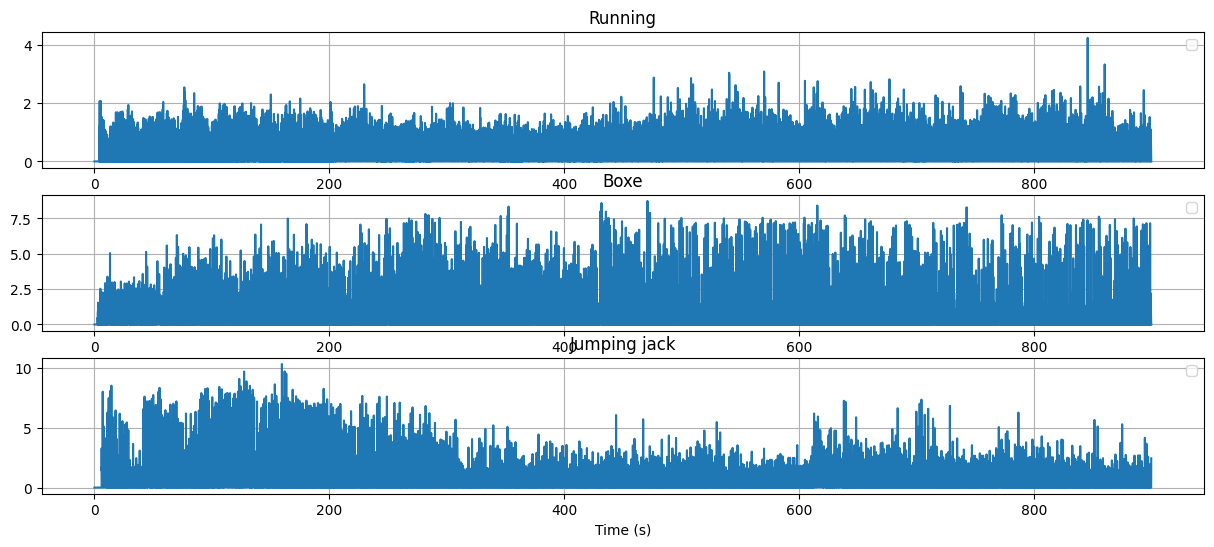

In [20]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15,6))

plt.subplot(3,1,1)

plt.plot(time,ENMO_run)
plt.xlabel('Time (s)') 
plt.ylabel('') 
plt.title('Running')
plt.gca().legend()
plt.grid()

plt.subplot(3,1,2)

plt.plot(time,ENMO_box)
plt.xlabel('Time (s)') 
plt.ylabel('') 
plt.title('Boxe')
plt.gca().legend()
plt.grid()

plt.subplot(3,1,3)

plt.plot(time,ENMO_jump)
plt.xlabel('Time (s)') 
plt.ylabel('') 
plt.title('Jumping jack')
plt.gca().legend()
plt.grid()

##### **Integration over EPOCH**

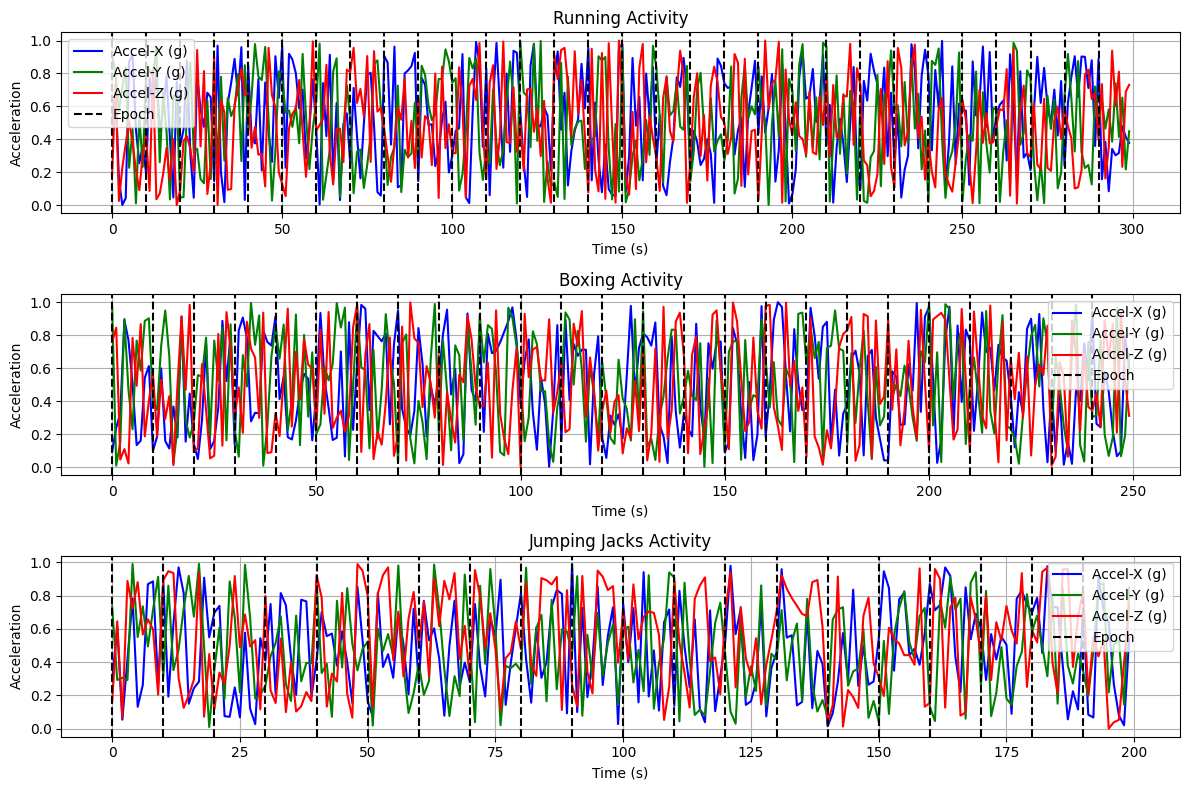

In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


time_run = np.arange(0, 300, 1)  
time_box = np.arange(0, 250, 1)  
time_jump = np.arange(0, 200, 1)  


Acc_run = np.random.rand(len(time_run), 3)  
Acc_box = np.random.rand(len(time_box), 3)  
Acc_jump = np.random.rand(len(time_jump), 3)  


epoch_size = 10


epochs_run = np.arange(0, len(time_run), epoch_size)
epochs_box = np.arange(0, len(time_box), epoch_size)
epochs_jump = np.arange(0, len(time_jump), epoch_size)


plt.figure(figsize=(12, 8))


plt.subplot(3, 1, 1)
plt.plot(time_run, Acc_run[:, 0], label='Accel-X (g)', color='blue')
plt.plot(time_run, Acc_run[:, 1], label='Accel-Y (g)', color='green')
plt.plot(time_run, Acc_run[:, 2], label='Accel-Z (g)', color='red')
plt.xlabel('Time (s)')
plt.ylabel('Acceleration')
plt.title('Running Activity')
for epoch in epochs_run:
    plt.axvline(x=epoch, color='black', linestyle='--', label='Epoch' if epoch == epochs_run[0] else "")  
plt.legend()
plt.grid()


plt.subplot(3, 1, 2)
plt.plot(time_box, Acc_box[:, 0], label='Accel-X (g)', color='blue')
plt.plot(time_box, Acc_box[:, 1], label='Accel-Y (g)', color='green')
plt.plot(time_box, Acc_box[:, 2], label='Accel-Z (g)', color='red')
plt.xlabel('Time (s)')
plt.ylabel('Acceleration')
plt.title('Boxing Activity')
for epoch in epochs_box:
    plt.axvline(x=epoch, color='black', linestyle='--', label='Epoch' if epoch == epochs_box[0] else "")  
plt.legend()
plt.grid()


plt.subplot(3, 1, 3)
plt.plot(time_jump, Acc_jump[:, 0], label='Accel-X (g)', color='blue')
plt.plot(time_jump, Acc_jump[:, 1], label='Accel-Y (g)', color='green')
plt.plot(time_jump, Acc_jump[:, 2], label='Accel-Z (g)', color='red')
plt.xlabel('Time (s)')
plt.ylabel('Acceleration')
plt.title('Jumping Jacks Activity')
for epoch in epochs_jump:
    plt.axvline(x=epoch, color='black', linestyle='--', label='Epoch' if epoch == epochs_jump[0] else "")  
plt.legend()
plt.grid()


plt.tight_layout()
plt.show()


### 3. Estimated energy costs